In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal

In [2]:
params = cx.params_all.copy()
params["exp_name"] = "play"
params["data_size"] = 30
params["calib_methods"] = ["RF", "CRF"]
params["hyper_opt"] = False
params["depth"] = 10

exp_key = "boot_count"
exp_values = [5]

In [3]:
calib_results_dict, data_list = cx.run_exp(exp_key, exp_values, params)
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)

>>>>>>> CRF vs RF True
CRF
 [0 1 0 0 0 0 0 1 0]
CRF
 [[0.854 0.146]
 [0.291 0.709]
 [0.755 0.245]
 [0.755 0.245]
 [0.5 0.5]
 [0.854 0.146]
 [0.5 0.5]
 [0.291 0.709]
 [0.755 0.245]]
RF
 [0 1 0 0 0 0 0 1 0]
RF
 [[0.8 0.2]
 [0.3 0.7]
 [0.7 0.3]
 [0.7 0.3]
 [0.5 0.5]
 [0.8 0.2]
 [0.5 0.5]
 [0.3 0.7]
 [0.7 0.3]]
key  5_RF_acc
key  5_CRF_acc
key  5_RF_tce
key  5_CRF_tce
key  5_RF_logloss
key  5_CRF_logloss
key  5_RF_brier
key  5_CRF_brier
key  5_RF_ece
key  5_CRF_ece
key  5_RF_auc
key  5_CRF_auc
key  5_CRF_fit


/Users/mhshaker/Documents/PhD/Projects/RF_ranking_calibration/Experiments/RF parameters/../../CalibrationM.py:63: RuntimeWarning: Mean of empty slice.
  bin_conf = prob_max[bin*bin_size:(bin+1)*bin_size].mean()
/Users/mhshaker/Documents/PhD/Projects/RF_ranking_calibration/RFcalib/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/mhshaker/Documents/PhD/Projects/RF_ranking_calibration/Experiments/RF parameters/../../CalibrationM.py:64: RuntimeWarning: invalid value encountered in scalar divide
  bin_acc = correctness_map[bin*bin_size:(bin+1)*bin_size].sum() / bin_size


In [4]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF', 'CRF']

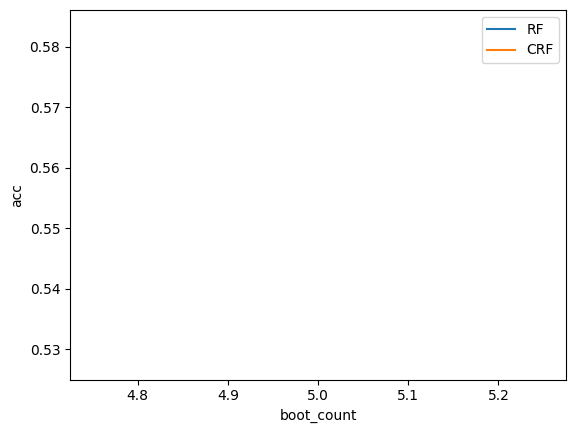

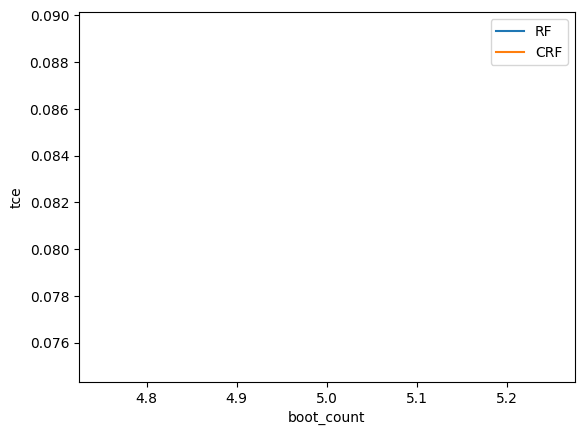

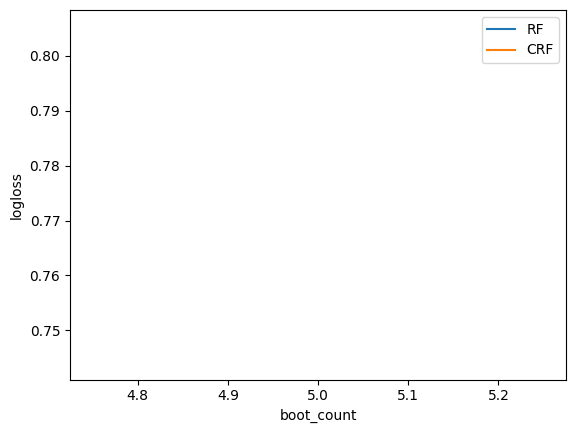

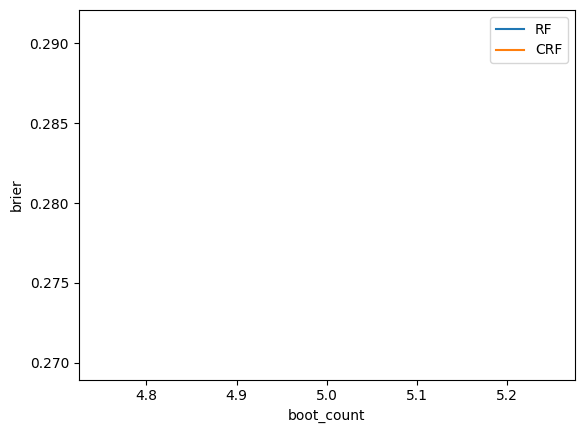

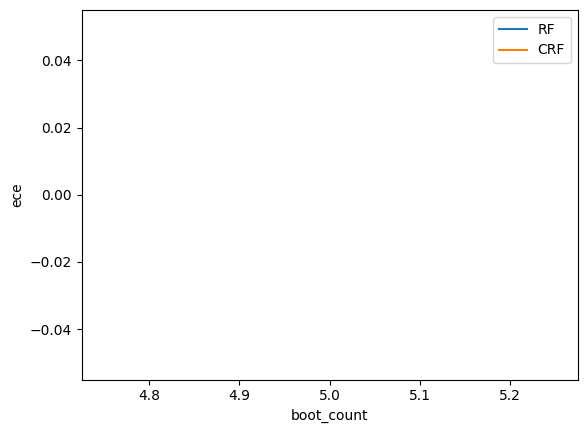

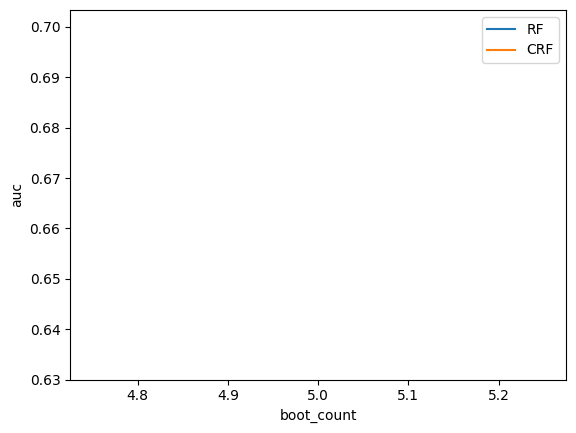

In [5]:
for metric in params["metrics"]:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(exp_key)
    ax.set_ylabel(metric)